In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data
create random points in the interval [-1, 1]

Points: [ 0.272064   -0.3814194   0.61257716  0.10867963 -0.61190139]


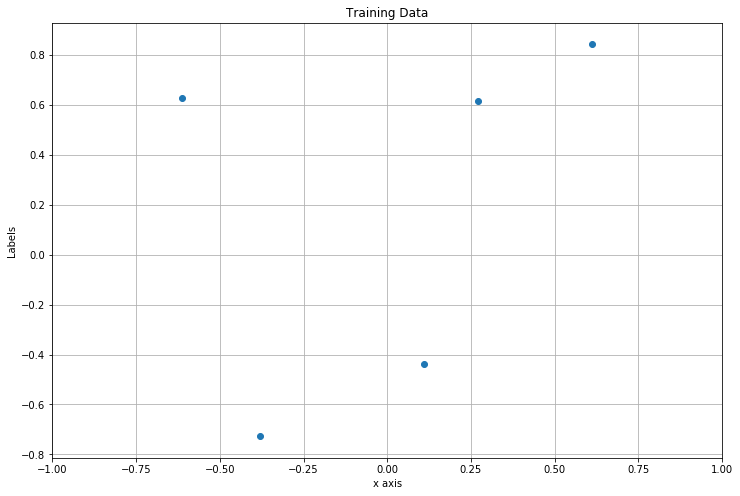

In [8]:
# number of data point to train on
point_num = 5

# Polynom degree to fit
poly_degree = 4

# Generate the points (x,y): make sure the mean is 0
point_x = np.array([100, -100])
while point_x.max()>1.0 and point_x.min()<-1.0:
    point_x = np.random.uniform(low=-1.0, high=1.0, size=point_num)
    point_x -= point_x.mean()
point_y = np.random.uniform(low=-1, high=1, size=point_num)[:, np.newaxis] #column vector
print('Points: {}'.format(point_x))


# Plot the point
plt.figure(figsize=(12, 8))
plt.scatter(point_x, point_y)
plt.grid()
plt.ylabel('Labels')
plt.xlabel('x axis')
plt.title('Training Data')
plt.xlim([-1, 1])
plt.show()

# X data matrix

create data matrix
$X = \begin{bmatrix}
    1       & 1 & 1 & \dots & 1\\
    x_1       & x_{2} & x_{3} & \dots & x_{point\_num} \\
     \vdots & \vdots  & \vdots  & \dots & \vdots\\
    x_{1}^{poly\_degree}     & x_{2}^{poly\_degree} & x_{3}^{poly\_degree} & \dots & x_{point\_num}^{poly\_degree}
\end{bmatrix}$

$y= X^T \theta + e$

In [9]:
X = []
for n in range(poly_degree + 1):
    # create feature vector and add to data matrix
    X.append(point_x**n)
X = np.asarray(X)
print(X)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [ 2.72063996e-01 -3.81419399e-01  6.12577163e-01  1.08679629e-01
  -6.11901389e-01]
 [ 7.40188178e-02  1.45480758e-01  3.75250780e-01  1.18112618e-02
   3.74423310e-01]
 [ 2.01378553e-02 -5.54891832e-02  2.29870058e-01  1.28364355e-03
  -2.29110143e-01]
 [ 5.47878539e-03  2.11646509e-02  1.40813148e-01  1.39505905e-04
   1.40192815e-01]]


# Least sqaure estimator

Theta=[[ -0.989   4.033  10.879 -10.29  -16.731]]


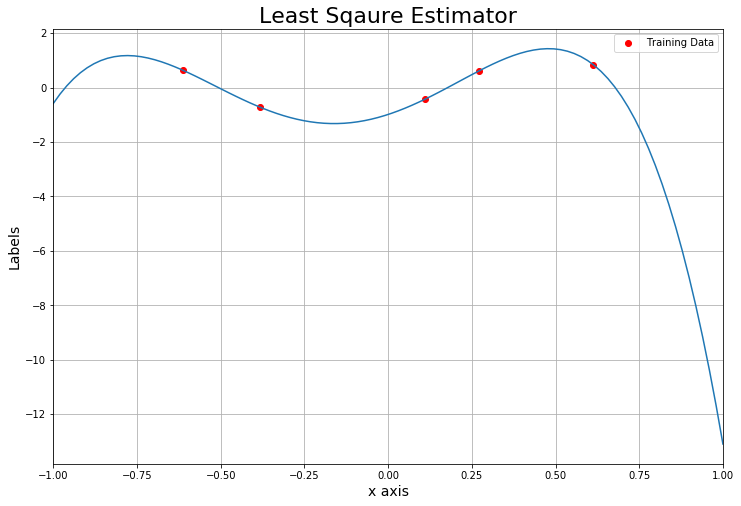

In [10]:
thetha = np.linalg.inv(np.matmul(X, X.transpose())).dot(X).dot(point_y)
print('Theta={}'.format(np.round(thetha.transpose(),3)))
y_sample = []
test_samples = np.linspace(-1, 1, 100)[:, np.newaxis]
for x_n in test_samples.tolist():
    temp = []
    for n in range(poly_degree + 1):
        temp.append(np.array(x_n)**n)
    x_n = np.asarray(temp)

    y_sample.append(x_n.transpose().dot(thetha))

# Plot the estimated labels on the interval [-1, 1]
plt.figure(figsize=(12, 8))
plt.plot(test_samples,  np.asarray(y_sample).squeeze(1))
plt.scatter(point_x, point_y, label='Training Data', c='r')
plt.grid()
plt.ylabel('Labels', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.title('Least Sqaure Estimator', fontsize=22)
plt.xlim([-1, 1])
plt.legend()
plt.show()

# Calculate the Regret

Regret:
$ log(\Gamma) = -log(1 - x_N^T (XX^T)^{-1} x_N) $

In [11]:
regret = []
test_samples = np.linspace(-1, 1, 100)
features = []
for x_test_point in test_samples:
    x_n = []
    for n in range(poly_degree + 1):
        x_n.append(np.array(x_test_point)**n)
    x_n = np.expand_dims(np.asarray(x_n), 1)
    xxt_inv = np.linalg.inv(np.matmul(X,X.transpose())+np.finfo(float).eps)
    gamma = 1 - np.matmul(np.matmul(x_n.transpose(), xxt_inv), x_n)
    if gamma < 0:
        continue
    regret.append( - np.log10(gamma))
    features.append(x_test_point)
regret = np.asarray(regret).squeeze(-1)

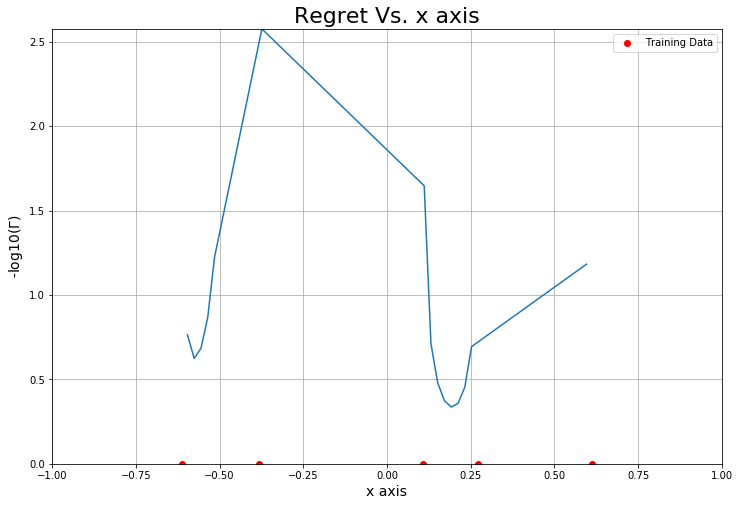

In [12]:
# Regret
plt.figure(figsize=(12, 8))
plt.plot(features, regret)
plt.scatter(point_x, np.zeros(point_x.shape), c='r', label='Training Data')
plt.grid()
plt.title('Regret Vs. x axis', fontsize=22)
plt.xlabel('x axis', fontsize=14)
plt.ylabel(r"-log10($\Gamma$)", fontsize=14)
plt.ylim([0, regret.max()])
plt.xlim([-1, 1])
plt.legend()
plt.show()
